In [113]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import AdamW, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [114]:
from tensorflow.keras.models import load_model

In [115]:
from keras.layers import LeakyReLU

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [117]:
# Simulating a dataset
data = pd.read_csv("battle5_data.csv")


In [118]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [119]:
# Preprocessing data
X = data.drop(columns=["Offset"]).values
y = data["Offset"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [120]:
model = load_model("regular.keras")

In [121]:
model.evaluate(X_test, y_test, verbose=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0731 - mean_squared_error: 0.1557 - r2_score: 0.2319 


[0.07380123436450958, 0.15745912492275238, 0.22664278745651245]

In [122]:
model.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ 0.49802664],
       [ 0.26029894],
       [-0.0631692 ],
       ...,
       [ 0.26418123],
       [ 0.23680475],
       [-0.06742041]], dtype=float32)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


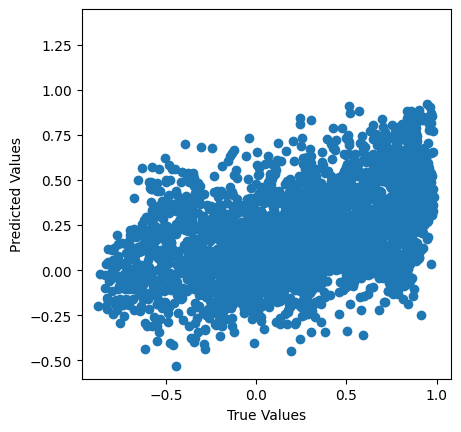

In [123]:
predictions = model.predict(X_test).flatten()

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.axis('equal')
plt.axis('square')

plt.show()


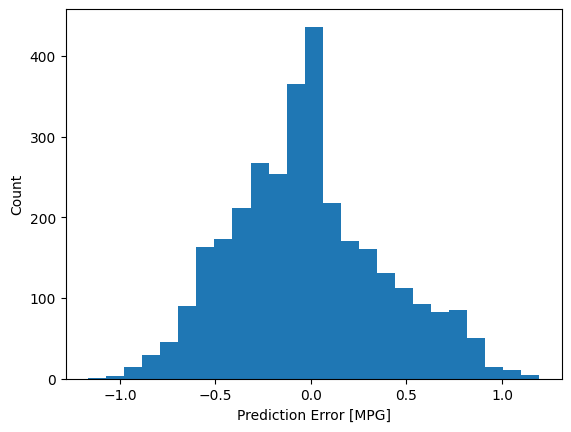

In [124]:
error = predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [125]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 60)             │           540 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,995 (39.05 KB)

 Trainable params: 3,331 (13.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,664 (26.04 KB)

In [126]:
# Get the weights and biases from the model
weights = model.get_weights()

# Extract weights and biases for each layer
W1, b1 = weights[0], weights[1]  # First hidden layer weights and biases
W2, b2 = weights[2], weights[3]  # Second hidden layer weights and biases
W3, b3 = weights[4], weights[5]  # Output layer weights and biases

# Define activation functions
def relu(x):
    alpha = 0.02
    return np.maximum(alpha*x, x)
    
def linear(x):
    return x

# Manually perform the forward pass
def manual_predict(X_input):
    # First hidden layer
    Z1 = np.dot(X_input, W1) + b1
    A1 = relu(Z1)
    
    # Second hidden layer
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    # Output layer
    Z3 = np.dot(A2, W3) + b3
    output = linear(Z3)
    
    return output

# Example prediction for a single input instance
X_input = X_train[1:2]  # Use a single example from your training data
manual_prediction = manual_predict(X_input)

print("Manual prediction:", manual_prediction)

# Compare with the model's prediction
model_prediction = model.predict(X_input)
print("Model prediction:", model_prediction)


Manual prediction: [[ 0.67504505 -1.3314493   0.39629721 -0.07570364  1.08922911 -0.09226665
   0.4356076   1.29443629  0.74438694  0.47504    -0.85842783  0.19723946
   1.01629474  0.7499688   0.37129974  0.41339692 -0.09698834 -0.26144325
   1.12144731 -0.07320176 -0.8220568  -0.41671909 -0.88110521 -0.21456287
  -0.80169384 -1.14919788  0.10572586 -0.17155753  1.04519604  0.45593227]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Model prediction: [[-0.03499768]]


In [127]:
X_input

array([[ 0.00674938, -0.04067634,  1.04659312,  0.39713574,  0.28586752,
        -1.04854504,  4.26545643, -0.31823093]])

In [128]:

# Assuming you have already trained your model and have the alpha, n, and pca values
alpha = 0.01
n = 1
pca_applied = False  # or False

# Get the model weights and biases
weights = model.get_weights()

# Open a text file to save the data
with open("model_weights.txt", "w") as f:
    # Write alpha, n, and pca
    f.write(f"alpha: {alpha}\n")
    f.write(f"n: {n}\n")
    f.write(f"pca: {pca_applied}\n")

    # Write the weights and biases
    for layer in weights:
        np.savetxt(f, layer, delimiter=",", fmt="%.8f")
        f.write("\n")  # Separate layers with a newline


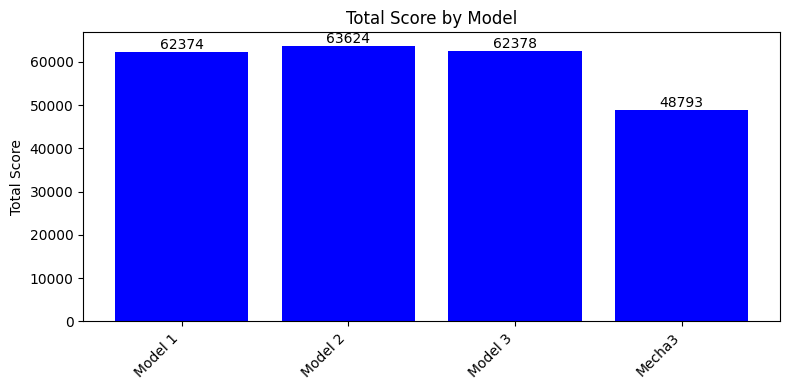

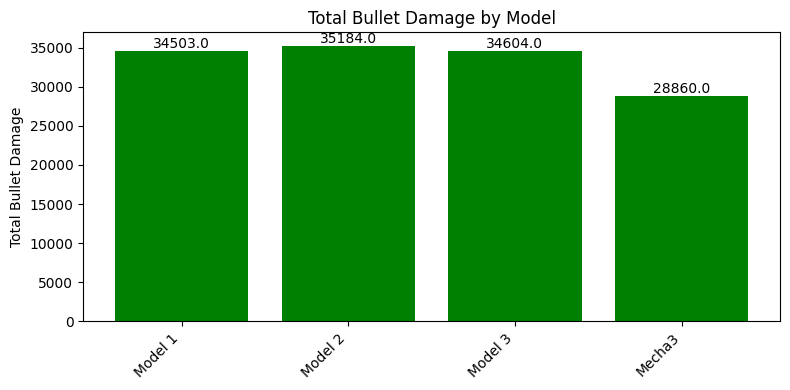

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('/home/luiz/Downloads/test/sim/battle_results.csv', names=['MyRobotName', 'OpponentName', 'MyScore', 'MyBulletDamage'])

# Assuming you know the number of models and battles per model
num_battles_per_model = 9
num_models = len(df) // num_battles_per_model

# Find the row where opponent is "rarmy.Mecha3 3.2"
opponent_filter = df['OpponentName'] == "rarmy.Mecha3 3.2 (2)"

# Modify the 'MyScore' value in that row
df.loc[opponent_filter, 'MyScore'] = 6300  
df.loc[opponent_filter, 'MyBulletDamage'] = 3122
# Create a model identifier
df['Model'] = np.repeat(range(1, num_models + 1), num_battles_per_model)

# Group by 'Model' and sum the scores and bullet damage
score_summary = df.groupby('Model')['MyScore'].sum().reset_index()
bullet_damage_summary = df.groupby('Model')['MyBulletDamage'].sum().reset_index()

# Customize the x-axis labels
model_labels = [f"Model {i}" for i in range(1, num_models)] + ["Mecha3"]

# Plotting Total Score by Model
plt.figure(figsize=(8, 4))
bars = plt.bar(score_summary['Model'], score_summary['MyScore'], color='blue')
plt.ylabel('Total Score')
plt.title('Total Score by Model')
plt.xticks(ticks=score_summary['Model'], labels=model_labels, rotation=45, ha='right')

# Display the value above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting Total Bullet Damage by Model
plt.figure(figsize=(8, 4))
bars = plt.bar(bullet_damage_summary['Model'], bullet_damage_summary['MyBulletDamage'], color='green')
plt.ylabel('Total Bullet Damage')
plt.title('Total Bullet Damage by Model')
plt.xticks(ticks=bullet_damage_summary['Model'], labels=model_labels, rotation=45, ha='right')

# Display the value above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


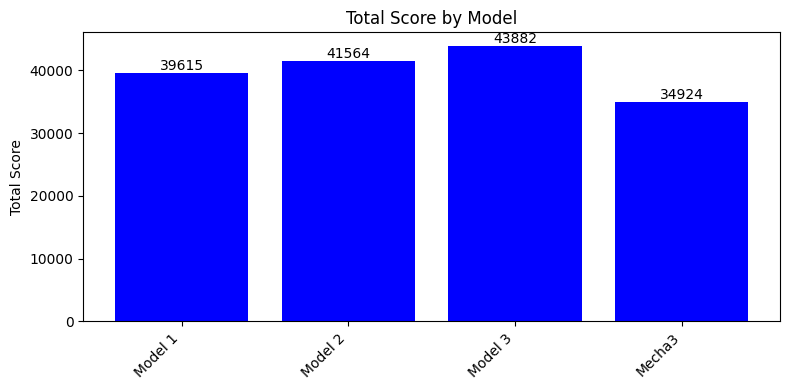

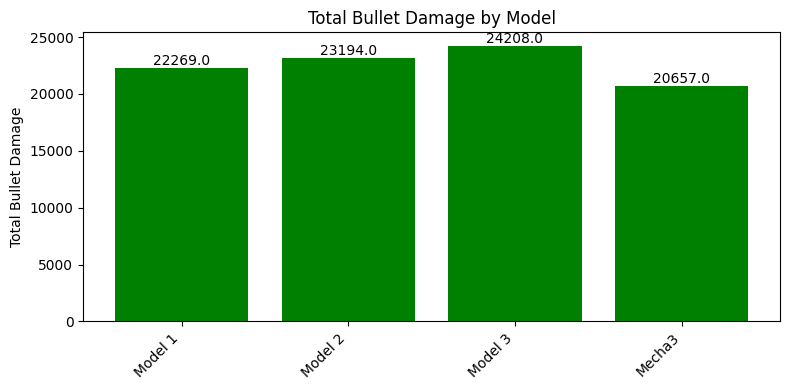

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
df = pd.read_csv('/home/luiz/Downloads/test/sim/test_battle_results.csv', names=['MyRobotName', 'OpponentName', 'MyScore', 'MyBulletDamage'])

# Assuming you know the number of models and battles per model
num_battles_per_model = 5
num_models = len(df) // num_battles_per_model

# Your list of values
model_list = [3, 2, 1, 4]

# Repeat the elements in the list to match the total number of repetitions
repeated_model_list = np.repeat(model_list, num_battles_per_model)

# Assign the repeated list to the DataFrame column
df['Model'] = repeated_model_list

# Sort by 'Model' to ensure the models are in the correct order
df = df.sort_values(by='Model')

# Group by 'Model' and sum the scores and bullet damage
score_summary = df.groupby('Model')['MyScore'].sum().reset_index()
bullet_damage_summary = df.groupby('Model')['MyBulletDamage'].sum().reset_index()

# Customize the x-axis labels
model_labels = [f"Model {i}" for i in range(1, num_models)] + ["Mecha3"]

# Plotting Total Score by Model
plt.figure(figsize=(8, 4))
bars = plt.bar(score_summary['Model'], score_summary['MyScore'], color='blue')
plt.ylabel('Total Score')
plt.title('Total Score by Model')
plt.xticks(ticks=score_summary['Model'], labels=model_labels, rotation=45, ha='right')

# Display the value above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Plotting Total Bullet Damage by Model
plt.figure(figsize=(8, 4))
bars = plt.bar(bullet_damage_summary['Model'], bullet_damage_summary['MyBulletDamage'], color='green')
plt.ylabel('Total Bullet Damage')
plt.title('Total Bullet Damage by Model')
plt.xticks(ticks=bullet_damage_summary['Model'], labels=model_labels, rotation=45, ha='right')

# Display the value above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
